# Automate Machine Learning with H2O AutoML

Machine Learning and Artificial Intelligence are the most searched content on the Internet among the programmers coming from different programming languages. The popularity of Machine Learning has led to a lot of research that today we have even reached to the concept of AutoML, where we can automate machine learning tasks by automating some of the complex processes of Machine Learning.

## H2O AutoML
With the packages provided by AutoML to Automate Machine Learning code, one useful package is H2O AutoML, which will automate machine learning code by automating the whole process involved in model selection and hyperparameters tuning.

Installing this package is as easy as installing all other packages in python. we just need to write – pip install h2o, in our terminal. if its in google colab we can install any package while writing the pip command in the cell itself using – !pip install h20.

## Scikit-learn Compatibility
H2OAutoML can interact with the h2o.sklearn module. The h2o.sklearn module exposes 2 wrappers for H2OAutoML (H2OAutoMLClassifier and H2OAutoMLRegressor), which expose the standard API familiar to sklearn users: fit, predict, fit_predict, score, get_params, and set_params. It accepts various formats as input data (H2OFrame, numpy array, pandas Dataframe) which allows them to be combined with pure sklearn components in pipelines. For an example using H2OAutoML with the h2o.sklearn modul.e

## Automate Machine Learning with H2O: Example
The dataset I will use for this task is Iris dataset, you also can load the Sklearn datasets. we are performing the classification problem to predict the species for the input features.

In [1]:
import h2o
from h2o.automl import H2OAutoML

h2o.init() # Initializing the H2O cluster

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.2+13-LTS-58, mixed mode, sharing)
  Starting server from C:\Users\abhij\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\abhij\AppData\Local\Temp\tmpelekn5u8
  JVM stdout: C:\Users\abhij\AppData\Local\Temp\tmpelekn5u8\h2o_abhij_started_from_python.out
  JVM stderr: C:\Users\abhij\AppData\Local\Temp\tmpelekn5u8\h2o_abhij_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_abhij_6eyzko
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.960 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [27]:
data = h2o.import_file(path="E:\DS\Algorithms\Datasets\diabetes.csv") # Importing a file with H2O
data_ = h2o.H2OFrame(data) # As like Pandas DataFrame H2O also have the same environment 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [28]:
# To understand the features I am using Correlation which is simple and forward
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("E:\DS\Algorithms\Datasets\diabetes.csv")
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


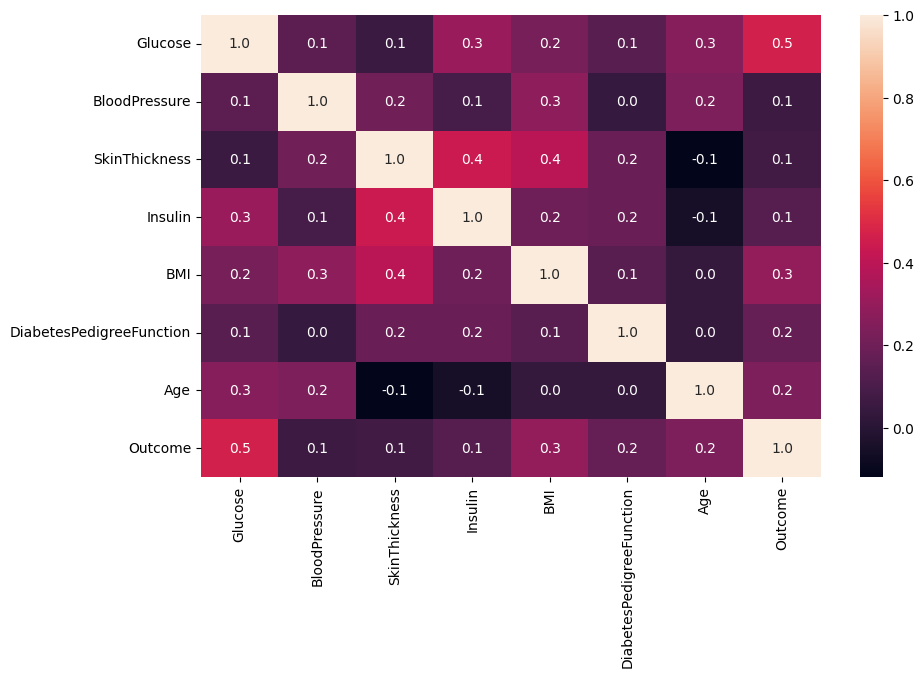

In [29]:
correlation = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, fmt='.1f')
plt.show()

In [33]:
# Based on correlation I think this are the best related features
X = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Our Binary outcomes
y = 'Outcome'

In [34]:
# Initialize the H2O AutoML to train with N_models and model reproducability is keeping 1
automl = H2OAutoML(max_models=20, seed=1) 

# Feading the data for training the models
automl.train(x=X, y=y, training_frame=data_) 

AutoML progress: |
22:08:22.839: AutoML: XGBoost is not available; skipping it.
22:08:22.988: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


22:08:24.32: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
22:08:25.499: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
22:08:27.123: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_1_20240124_220822_model_1


Status of Neuron Layers: predicting Outcome, regression, gaussian distribution, Quadratic loss, 10,701 weights/biases, 131.5 KB, 422,400 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms                momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ----------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        4        Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.0012813758202173632  0.0007941653020679951   0.0         -0.09733316172889317   0.24129104614257812  0.17495203146267965  0.1998768448829651
    3        100      RectifierDropout  10.0       0.0   0.0   0.007321257053212321   0.013109318912029266    0.0         -0.05859217239831851   0.12091729044914246  0.5882847308475705   0.20309525728225708
    4        1        Linear                       0.0   0.0   0.0006386007128458004  0.00040238548535853624  0.0         -0.032435159496963024  0.227705717086792    0.3468854338004947   1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.13132259444250446
RMSE: 0.3623845946539456
MAE: 0.30153076130582557
RMSLE: 0.25997773744136854
Mean Residual Deviance: 0.13132259444250446

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.1568202876849279
RMSE: 0.3960054137065905
MAE: 0.318767263985332
RMSLE: 0.28091319622526595
Mean Residual Deviance: 0.1568202876849279

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.318807  0.0231152   0.324765      0.322386      0.278636      0.332394      0.335855
mean_residual_deviance  0.156854  0.0130832   0.148032      0.155627      0.141241      0.165663      0.173705
mse                     0.156854  0.0130832   0.148032      0.155627      0.141241      0.165663      0.173705
r2                      0.30355   0.0446208   0.369483      0.327467      0.28791       0.261613      0.271278
residual_deviance       0.156854  0.0130832   0.148032      0.155627      0.141241      0.165663      0.173705
rmse                    0.395773  0.0165      0.384749      0.394496      0.37582       0.407017      0.41678
rmsle                   0.280832  0.00837813  0.274503      0.283273      0.270133      0.285492      0.29076

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-01-24 22:11:44  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2024-01-24 22:11:45  1 min  2.973 sec  9286 obs/sec      10        1             7680       0.394059         0.155283             0.308557        0.316496
    2024-01-24 22:11:50  1 min  8.070 sec  19469 obs/sec     150       15            115200     0.378338         0.143139             0.298632        0.369947
    2024-01-24 22:11:55  1 min 13.111 sec  25247 obs/sec     360       36            276480     0.365257         0.133413             0.278656        0.412761
    2024-01-24 22:11:59  1 min 17.087 sec  28347 obs/sec     550       55            422400     0.362385         0.131323             0.301531        0.421961

Vari

In [35]:
# Taking the Leaderboard consideration
leaderb = automl.leaderboard 
leaderb.head(rows=leaderb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_2_AutoML_1_20240124_220822_model_1,0.396005,0.15682,0.318767,0.280913,0.15682
StackedEnsemble_BestOfFamily_1_AutoML_1_20240124_220822,0.396186,0.156963,0.317495,0.277519,0.156963
StackedEnsemble_AllModels_1_AutoML_1_20240124_220822,0.398175,0.158544,0.322151,0.278926,0.158544
DeepLearning_grid_1_AutoML_1_20240124_220822_model_1,0.399896,0.159917,0.316388,0.282185,0.159917
DeepLearning_grid_3_AutoML_1_20240124_220822_model_1,0.40004,0.160032,0.3201,0.281181,0.160032
GBM_1_AutoML_1_20240124_220822,0.400481,0.160385,0.330147,0.281455,0.160385
GBM_grid_1_AutoML_1_20240124_220822_model_2,0.400514,0.160411,0.317022,0.280476,0.160411
DeepLearning_grid_1_AutoML_1_20240124_220822_model_2,0.401786,0.161432,0.324782,0.285338,0.161432
GBM_grid_1_AutoML_1_20240124_220822_model_5,0.403744,0.163009,0.312851,0.282755,0.163009
GBM_2_AutoML_1_20240124_220822,0.403867,0.163109,0.319803,0.283672,0.163109


In [51]:
# Create an H2OFrame with the input features
input_features = h2o.H2OFrame({'Glucose': [147], 'BMI': [35], 'DiabetesPedigreeFunction': [0.7], 'Age': [34]})

# Make predictions using the trained AutoML model
predictions = automl.predict(input_features)

# Display the predictions
print(predictions)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
  predict
 0.765687
[1 row x 1 column]



In [54]:
lb = h2o.automl.get_leaderboard(automl, extra_columns = 'ALL')
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_grid_2_AutoML_1_20240124_220822_model_1,0.396005,0.15682,0.318767,0.280913,0.15682,14957,0.01907,DeepLearning
StackedEnsemble_BestOfFamily_1_AutoML_1_20240124_220822,0.396186,0.156963,0.317495,0.277519,0.156963,698,0.059,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240124_220822,0.398175,0.158544,0.322151,0.278926,0.158544,527,0.070921,StackedEnsemble
DeepLearning_grid_1_AutoML_1_20240124_220822_model_1,0.399896,0.159917,0.316388,0.282185,0.159917,16321,0.002988,DeepLearning
DeepLearning_grid_3_AutoML_1_20240124_220822_model_1,0.40004,0.160032,0.3201,0.281181,0.160032,22288,0.02642,DeepLearning
GBM_1_AutoML_1_20240124_220822,0.400481,0.160385,0.330147,0.281455,0.160385,172,0.012518,GBM
GBM_grid_1_AutoML_1_20240124_220822_model_2,0.400514,0.160411,0.317022,0.280476,0.160411,70,0.004183,GBM
DeepLearning_grid_1_AutoML_1_20240124_220822_model_2,0.401786,0.161432,0.324782,0.285338,0.161432,11587,0.003037,DeepLearning
GBM_grid_1_AutoML_1_20240124_220822_model_5,0.403744,0.163009,0.312851,0.282755,0.163009,103,0.005475,GBM
GBM_2_AutoML_1_20240124_220822,0.403867,0.163109,0.319803,0.283672,0.163109,83,0.006122,GBM


In [55]:
m = h2o.get_model("DeepLearning_grid_2_AutoML_1_20240124_220822_model_1")

In [56]:
m.params.keys()
print(m)

Model Details
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_1_20240124_220822_model_1


Status of Neuron Layers: predicting Outcome, regression, gaussian distribution, Quadratic loss, 10,701 weights/biases, 131.5 KB, 422,400 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms                momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ----------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        4        Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.0012813758202173632  0.0007941653020679951   0.0         -0.09733316172889317   0.24129104614257812  0.17495203146267965  0.1998768448829651
    3        100      RectifierDropout  10.0    

In [48]:
# Get AutoML event log
log = automl.event_log

# Get training timing info
info = automl.training_info
print(log)
print(info)

timestamp     level    stage       message                                                                                                                                                     name    value
22:08:22.810  INFO     Workflow    Project: AutoML_1_20240124_220822
22:08:22.813  INFO     Validation  5-fold cross-validation will be used.
22:08:22.814  INFO     Validation  Setting stopping tolerance adaptively based on the training frame: 0.036084391824351615
22:08:22.814  INFO     Validation  Build control seed: 1
22:08:22.815  INFO     DataImport  training frame: Frame key: AutoML_1_20240124_220822_training_py_3_sid_b72c    cols: 8    rows: 768  chunks: 1    size: 8354  checksum: -710579425680460928
22:08:22.815  INFO     DataImport  validation frame: NULL
22:08:22.815  INFO     DataImport  leaderboard frame: NULL
22:08:22.816  INFO     DataImport  blending frame: NULL
22:08:22.816  INFO     DataImport  response column: Outcome
22:08:22.816  INFO     DataImport  fold column: nu

I hope you liked this article on AutoML H2O to automate our machine learning code.